In [2]:
import pandas as pd ## load in the pandas library for working with dataframes

In [3]:
## tell pandas to make a new DataFrame with the contents of `brain_counts.csv`. This might take a minute.
count_dataframe = pd.read_csv('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_counts.csv', # where to find the data
                              index_col=0) # use the first column to label the rows (the 'index')

In [4]:
## print the first 2 rows of our dataframe
print(count_dataframe.head(2)) 

                       0610005C13Rik  0610007C21Rik  0610007L01Rik  \
A1.B003290.3_38_F.1.1              0            125             16   
A1.B003728.3_56_F.1.1              0              0              0   

                       0610007N19Rik  0610007P08Rik  0610007P14Rik  \
A1.B003290.3_38_F.1.1              0              0              0   
A1.B003728.3_56_F.1.1              0              0            324   

                       0610007P22Rik  0610008F07Rik  0610009B14Rik  \
A1.B003290.3_38_F.1.1              0              0              0   
A1.B003728.3_56_F.1.1              0              0              0   

                       0610009B22Rik  ...  Zxdb  Zxdc  Zyg11a  Zyg11b  Zyx  \
A1.B003290.3_38_F.1.1              0  ...     0     0       0       0    0   
A1.B003728.3_56_F.1.1              0  ...     0     0       0       0    0   

                       Zzef1  Zzz3  a  l7Rn6  zsGreen_transgene  
A1.B003290.3_38_F.1.1      0     0  0     54                  0  


In [5]:
metadata_dataframe = pd.read_csv('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_metadata.csv', index_col=0)

In [6]:
print(metadata_dataframe.shape)

(3401, 5)


In [7]:
print(metadata_dataframe.head())

                        cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  
cell                                   
A1.B003290.3_38_F.1.1         B003290  
A1.B003728.3_56_F.1.1         B003728  
A1.MAA000560.3_10_M.1.1     MAA000560  
A1.MAA000564.3_10_M.1.1     MAA000564  
A1.MAA000923.3_9_M.1.1      MAA000923  


We can count the number of times each value appears in a column like this:

In [8]:
print(pd.value_counts(metadata_dataframe['subtissue']))

Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64


To repeat for each column in the dataframe:

In [9]:
for column in metadata_dataframe.columns.values:
    print(pd.value_counts(metadata_dataframe[column]))

oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64
Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64
M    2694
F     707
Name: mouse.sex, dtype: int64
3_10_M    980
3_9_M     871
3_8_M     590
3_38_F    355
3_11_M    253
3_39_F    241
3_56_F    111
Name: mouse.id, dtype: int64
MAA000560    287
MAA000926    263
MAA000581    190
MAA000944    184
MAA000932    174
MAA001894    147
MAA000564    143
MAA000942    136
MAA000935    131
MAA000941    125
MAA000930    111
MAA000923    108
MAA000947    107
B003290       98
MAA000561     97
MAA000615     95
B003275       93
MAA000641     67
B003728       66
MAA000940     63
MAA001895     60
MAA000563     57
MAA000925     55
B003277  

In [10]:
import scanpy as sc

In [11]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata)
adata.raw = adata

/var/folders/lt/m_y39jws5fxfm05nnd8dmvd80000gp/T/ipykernel_16181/1752949814.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)


AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'


In [12]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True 
        number_of_spike_ins += 1
    else:
        is_spike_in[gene_name] = False

adata.var['ERCC'] = pd.Series(is_spike_in)
print('found this many spike ins: ', number_of_spike_ins)


found this many spike ins:  92


In [ ]:
#save for later use
adata.write('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_raw.h5ad')

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
adata = sc.read('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_raw.h5ad')
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])
# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
                       n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                
A1.B003290.3_38_F.1.1               3359                 8.119696   
A1.B003728.3_56_F.1.1               1718                 7.449498   

                       total_counts  log1p_total_counts  \
cell                                                      
A1.B003290.3_38_F.1.1      390075.0           12.874097   
A1.B003728.3_56_F.1.1      776439.0           13.562474   

                       pct_counts_in_top_50_genes  \
cell                                                
A1.B003290.3_38_F.1.1                   25.884766   
A1.B003728.3_56_F.1.1                   43.051933   

                       pct_counts_in_top_100_genes  \
cell                                                 
A1.B003290.3_38_F.1.1                    32.847017   
A1.B003728.3_56_F.1.1                    52.912721   

            

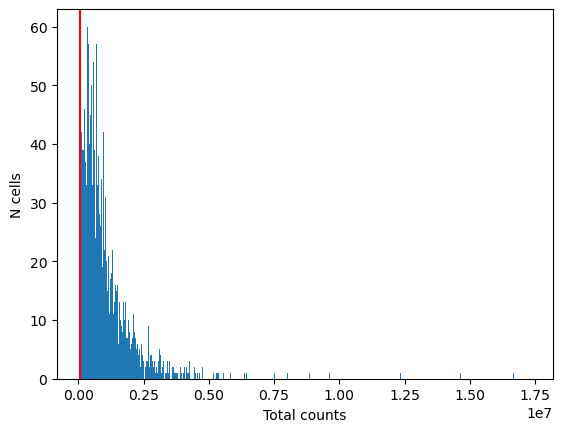

In [14]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')
#plt.xlim(0, 1e6)

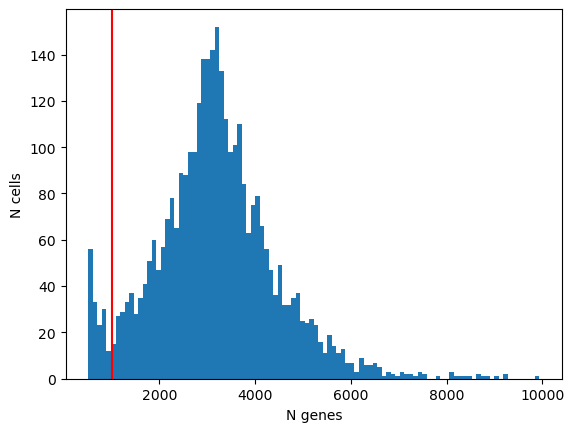

In [15]:
#count the total number of unique genes detected in each sample
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

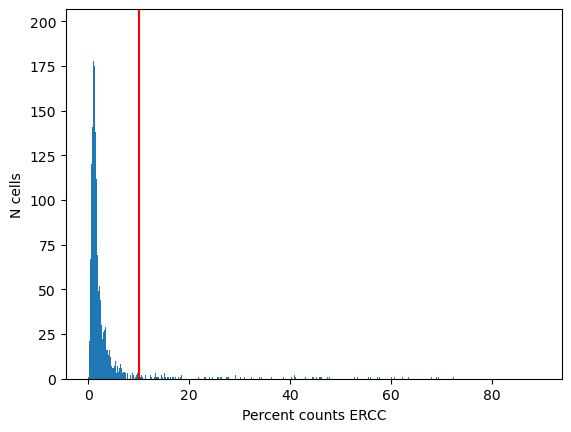

In [16]:
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color='red')

the majority of cells have less than 10% ERCC counts, but there's a long tail of cells that have very high spike-in counts, may be dead cellls and should be removed.

In [17]:
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
adata = adata[low_ERCC_mask]

In [18]:
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 750)
print('Finished with: \n', adata)

Started with: 
 View of AnnData object with n_obs × n_vars = 3218 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'


/Users/aaaz/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Finished with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'


# Quality control for genes
- remove genes whose expression level is considered "undetectable"
    *detectable*: at least 2 cells contain more than 5 reads from the gene
- genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.

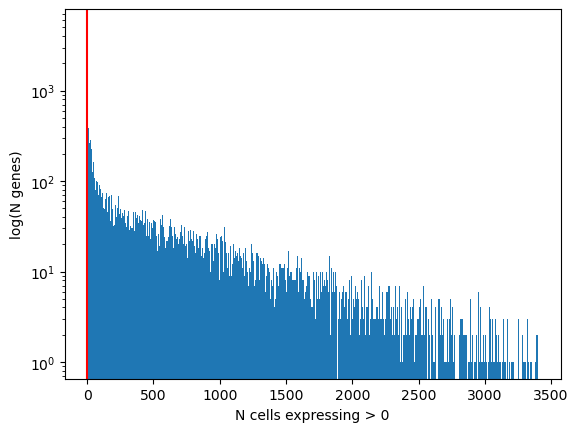

In [19]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)')
plt.axvline(2, color ='red')
plt.yscale('log')

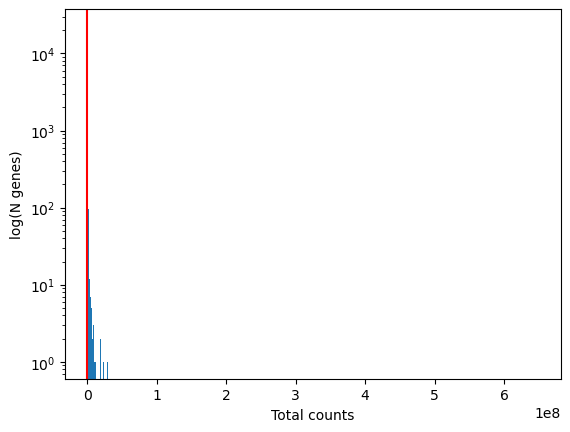

In [20]:
plt.hist(gene_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)')
plt.yscale('log')
plt.axvline(10, color='red')

In [21]:
#filter genes: appeared in at least 2 cells, 5 counts in each cell: min_cells = 2, min_counts = 10
print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 10)
print('Finishes with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'
Finishes with: 
 AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


In [ ]:
print(adata)
adata.write('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_qc.h5ad')

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


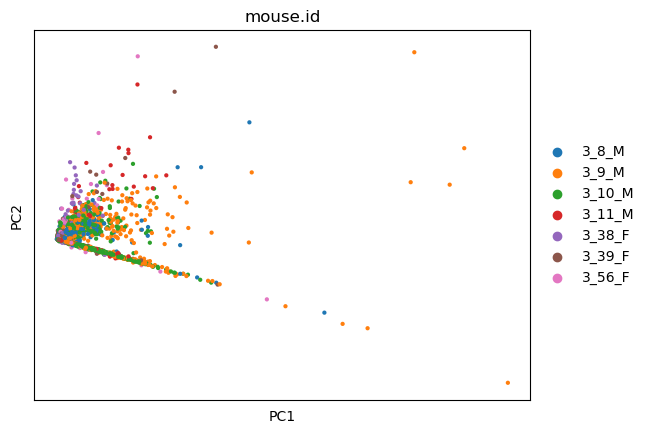

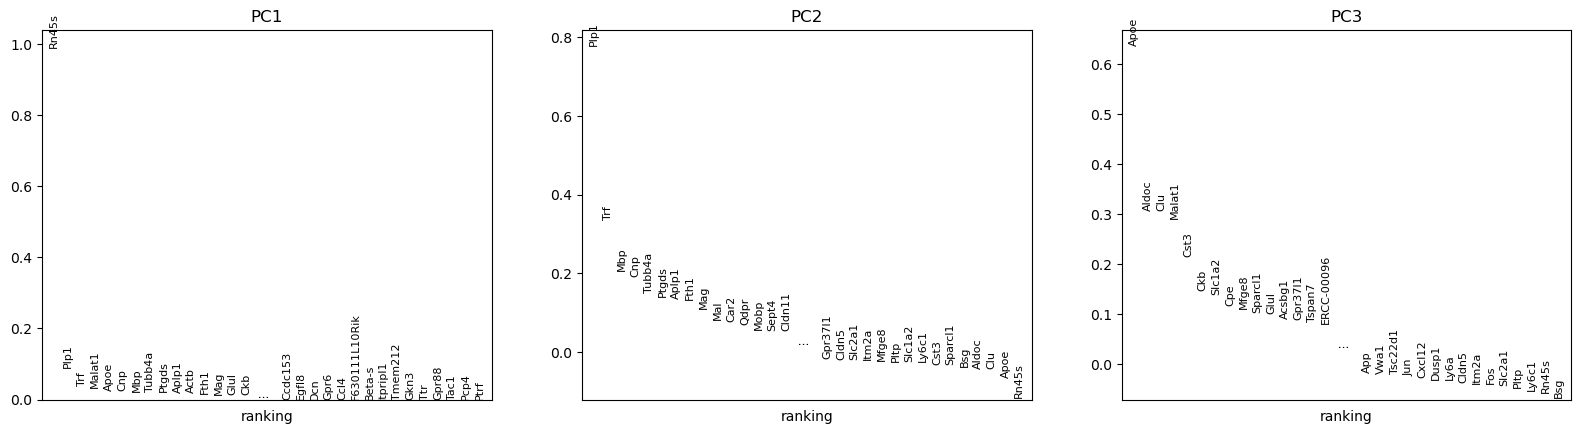

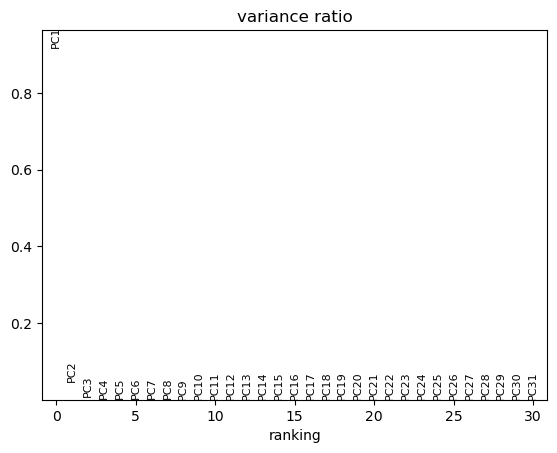

In [22]:
adata = sc.read('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_qc.h5ad')
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='mouse.id')

The first plot has a strange, very linear first PC (which captures the most variation in the dataset). This suggests that we have outliers in our data.

The next row of plots shows the loadings, which indicate how strongly each variable in the original data contributes to each principle component. Here, we see that the first PC is strongly determined by the expression of just a small number of genes.

The bottom plot shows us that the first principle component captures the vast majority of the variation in the raw data, and that a single gene dominates the variation in that component.



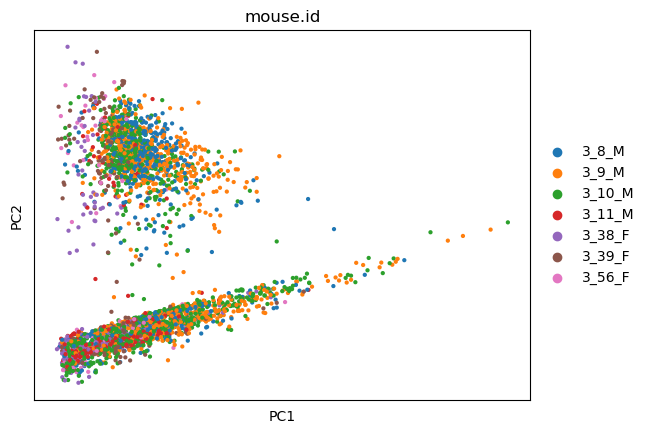

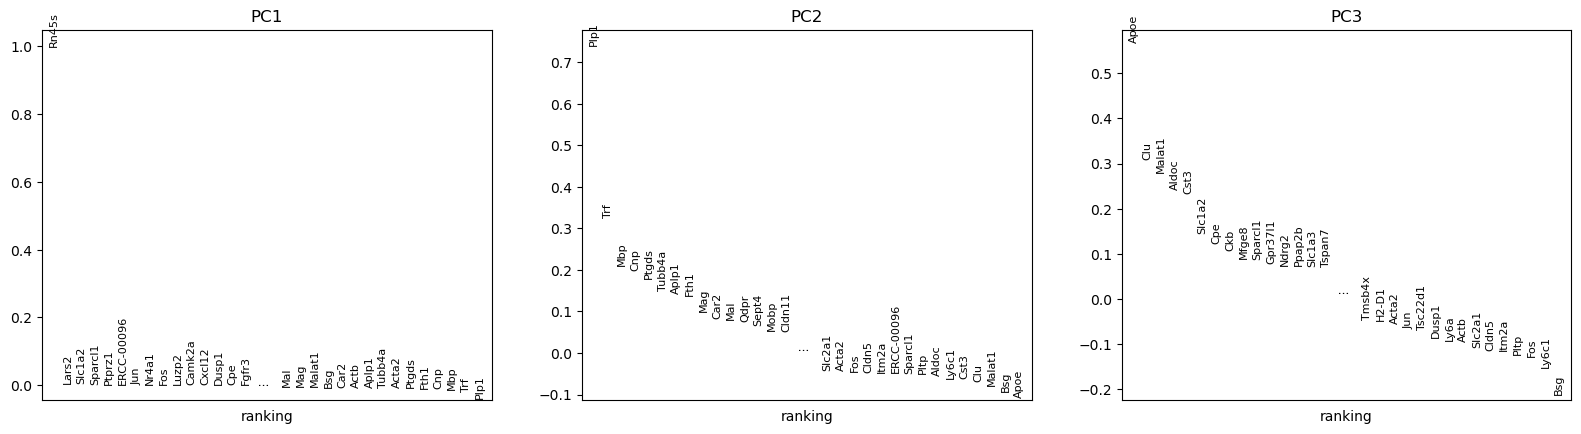

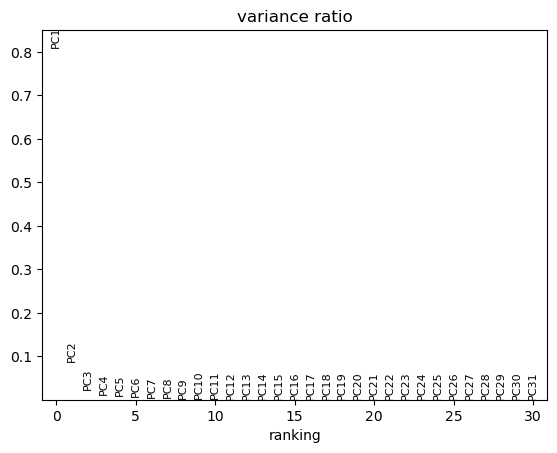

In [23]:
adata_cpm = adata.copy() #keep the original to compare method
adata_cpm.raw = adata_cpm
sc.pp.normalize_per_cell(adata_cpm, counts_per_cell_after=1e6)
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='mouse.id')

A potential drawback of CPM: the sample contains genes that are both very highly expressed and differentially expressed across the cells.
- the total molecules in the cell may depend of whether such genes are on/off in the cell and normalizing by total molecules may hide the differential expression of those genes and/or falsely create differential expression for the remaining genes. *(tổng số phân tử trong tế bào có thể phụ thuộc vào việc các gen đó có được bật/tắt trong tế bào hay không và việc chuẩn hóa bởi tổng số phân tử có thể che giấu biểu hiện khác biệt của các gen đó và/hoặc tạo sai biểu hiện khác biệt cho các gen còn lại).* 
--> solution: to exclude highly expressed genes from the size factor estimation.


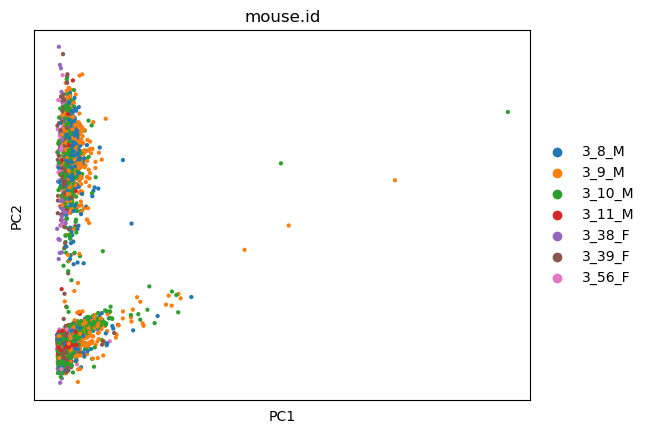

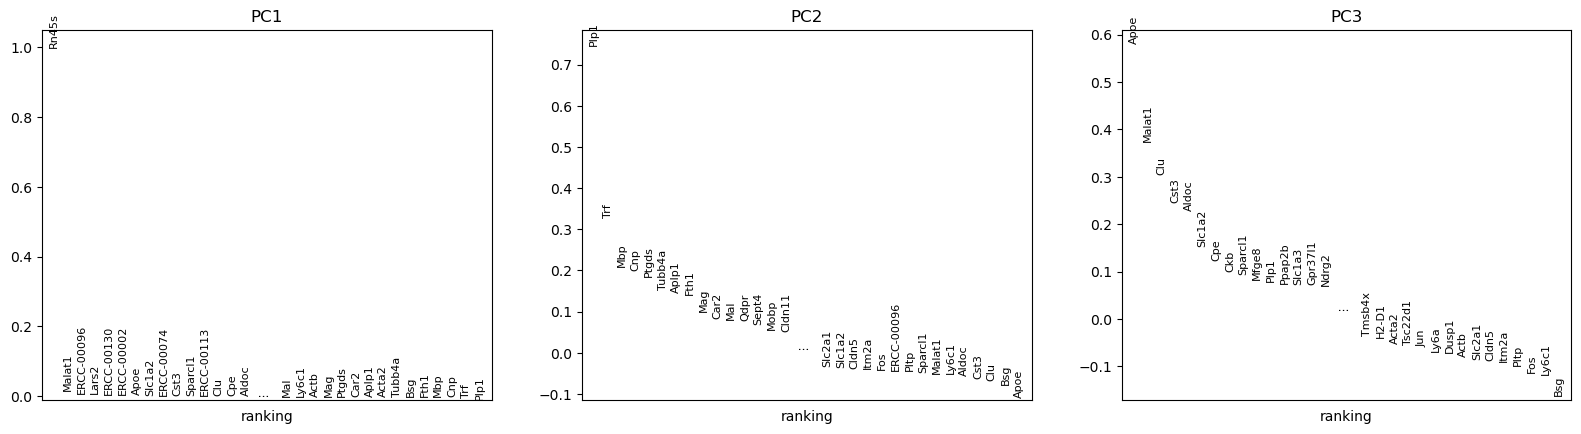

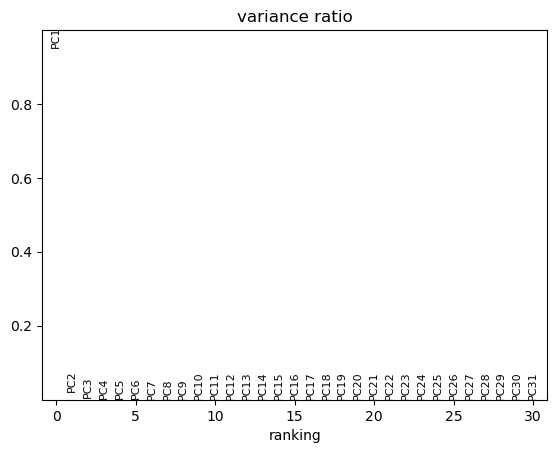

In [ ]:
adata_cpm_ex = adata.copy()
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.pca(adata_cpm_ex) #run pca 
sc.pl.pca_overview(adata_cpm_ex, color='mouse.id')

# Normalizing gene expression
remove the offending gene Rn45s

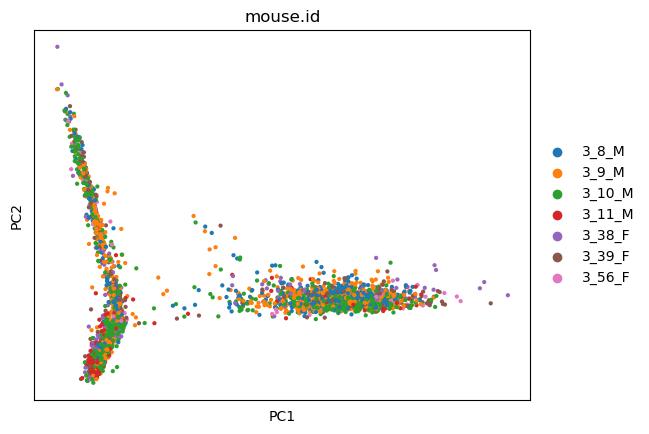

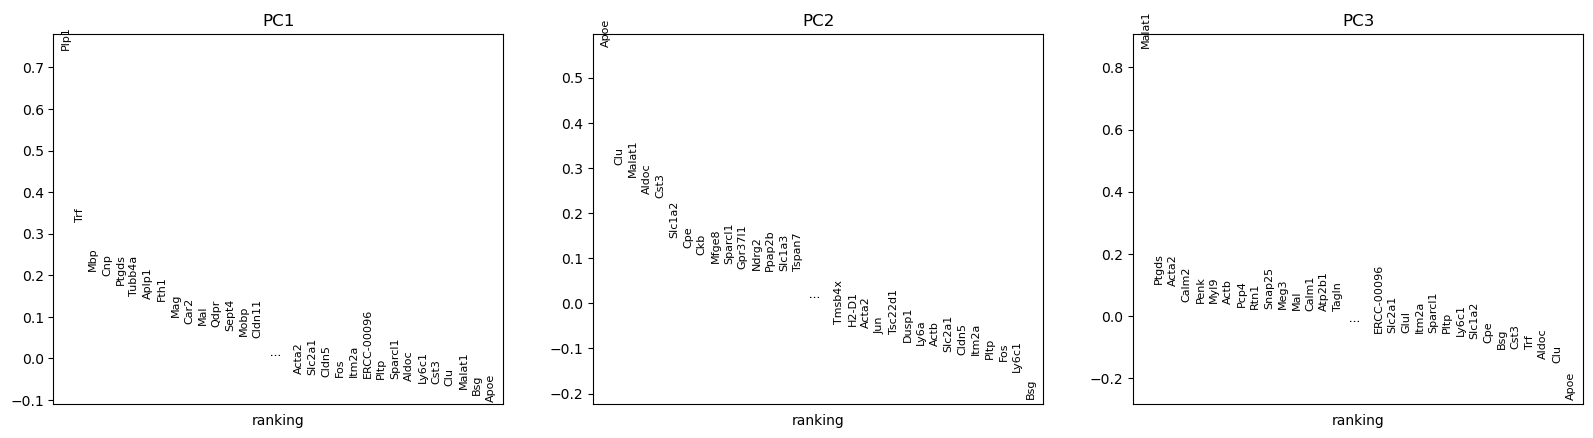

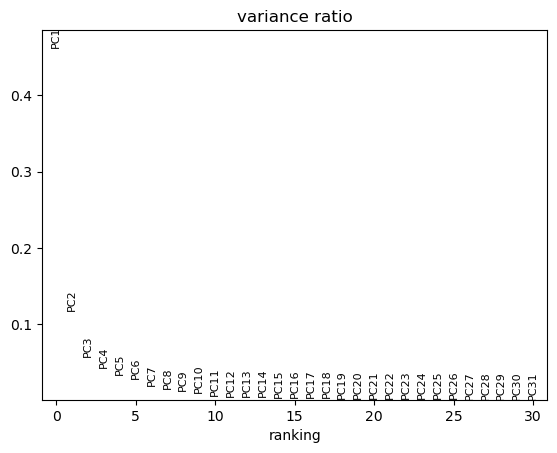

In [ ]:
# remove the ofending gen Rn45s
not_Rn45s = adata_cpm.var.index != 'Rn45s'
adata_no_Rn45s = adata_cpm[:, not_Rn45s]

sc.pp.pca(adata_no_Rn45s)
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id')

There are now other genes in PC1 that contribute meaningfully to its loading, and PC1 is no longer the only component that contributes significant variation.

## centering and scaling: doing this places an equal weight on each gene for downstream analysis that needs to be careful
+ de-emphasizes the small handful of genes that are differentially expressed at high levels. 

First, we take the log(1+x) of each value. The +1 makes sure that 0 values in the original data still map to 0 in log space (and prevents us from trying to take the log of 0). This makes the expression values more closely approximate a Gaussian distribution, which is an assumption inherent to many downstream analysis methods.
Then for each gene, we substract the mean expression value and divide by th standard deviation

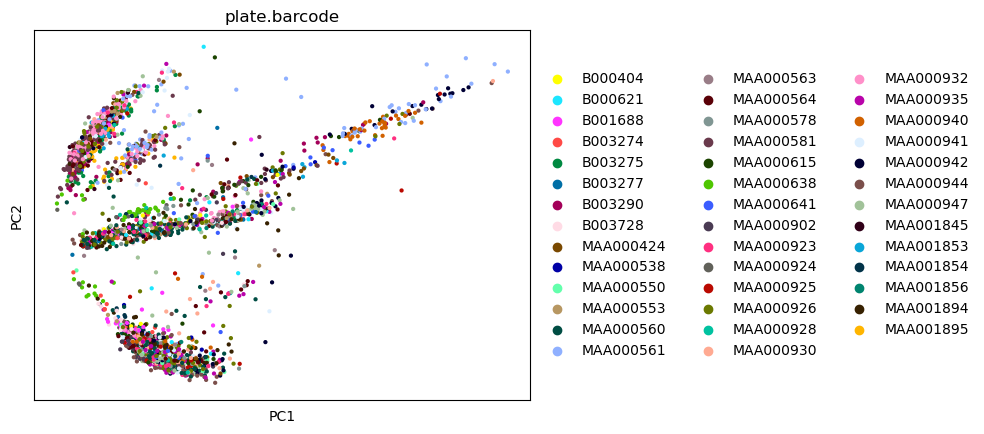

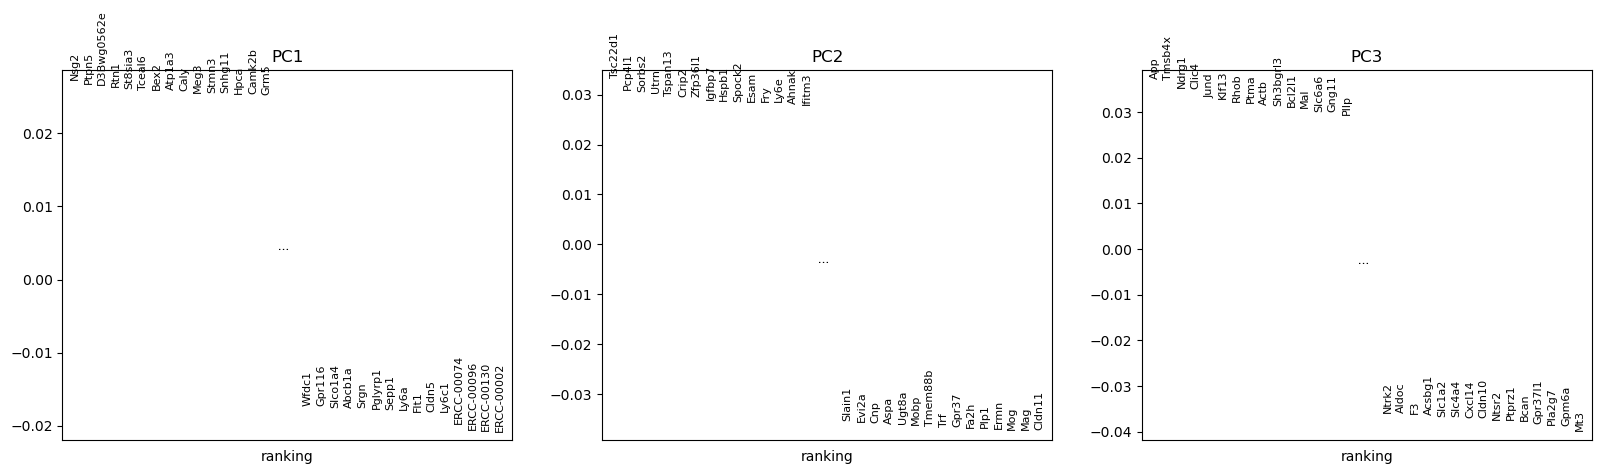

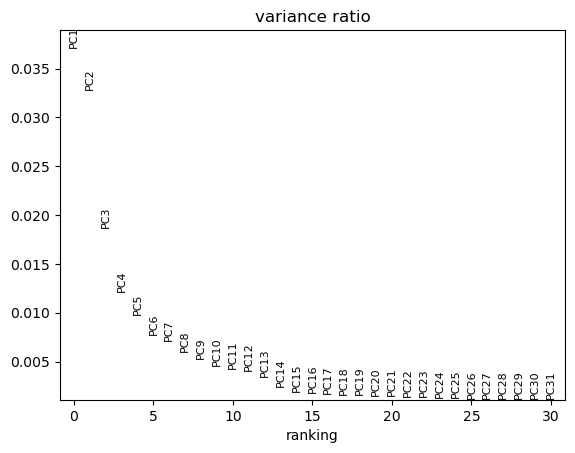

In [ ]:
sc.pp.log1p(adata_cpm)
sc.pp.scale(adata_cpm)

sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='plate.barcode')

- the first plot shows more Gaussian-looking groups of cells
- the second row of plots shows more genes indicating that each PC is driven by multiple genes 
- the final plot shows that each of the first ~5-10 components captures some of the variance in the data.

In [ ]:
adata_cpm.write('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_normalized.h5ad')

# Dimensionality redution

In [42]:
adata = sc.read('/Users/aaaz/Documents/Documents - Chau’s MacBook Air/code/data/brain_normalized.h5ad')

/Users/aaaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


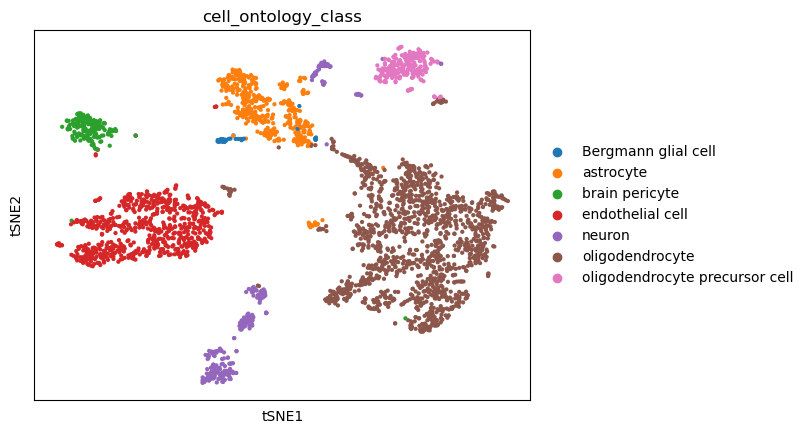

In [43]:
#tSNE
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)

sc.pl.tsne(adata, color='cell_ontology_class')

/Users/aaaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


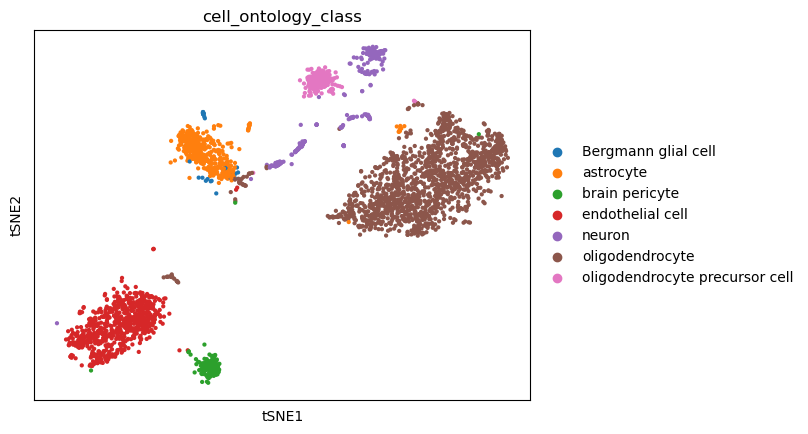

In [57]:
#tSNE
sc.tl.tsne(adata, perplexity=250, learning_rate=1300, random_state=0)

sc.pl.tsne(adata, color='cell_ontology_class')